In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [35]:
# Funciones auxiliares generales
def filtrar_outliers(df, columna, p_inf=0.01, p_sup=0.99):
    """Filtra valores extremos de una columna numérica usando percentiles."""
    lim_inf = df[columna].quantile(p_inf)
    lim_sup = df[columna].quantile(p_sup)
    return df[df[columna].between(lim_inf, lim_sup)]

# Cargar y preparar los datos
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
    df["gluc"] = (df["gluc"] > 1).astype(int)
    df["age_years"] = (df["age"] / 365).astype(int)
    return df

def agregar_bmi(df):
    """Calcula el IMC y agrega las columnas 'BMI' e 'overweight' al DataFrame."""
    bmi = df["weight"] / ((df["height"] / 100) ** 2)
    df["BMI"] = bmi
    df["overweight"] = (bmi > 25).astype(int)
    return df

In [36]:
ruta = "C:/Users/trezz/Desktop/proyectosDeDesarrolloWeb/MedicalExamination/data/medical_examination.csv"
df = cargar_datos(ruta)
df = agregar_bmi(df)

# Filtrar outliers
for col in ["height", "weight", "ap_hi", "ap_lo", "BMI"]:
    df = filtrar_outliers(df, col)

# Arboles de Decision

In [37]:
# Definir variables predictoras (X) y objetivo (y), la variable objetivo es cardio (enfermedad cardiovascular)
X = df.drop(columns=["cardio", "age"])   # todas las columnas menos la target y age porque usamos age_years  
y = df["cardio"]

# Dividir en entrenamiento y prueba (train_size=0.8)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar el árbol de decisión
tree = DecisionTreeClassifier(
    criterion="gini",   # también podés probar "entropy"
    max_depth=4,        # limitar profundidad para evitar sobreajuste
    random_state=42
)
tree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
# Evaluar el modelo
y_pred = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.7254044935204356
Matriz de confusión:
 [[4699 1857]
 [1724 4761]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      6556
           1       0.72      0.73      0.73      6485

    accuracy                           0.73     13041
   macro avg       0.73      0.73      0.73     13041
weighted avg       0.73      0.73      0.73     13041



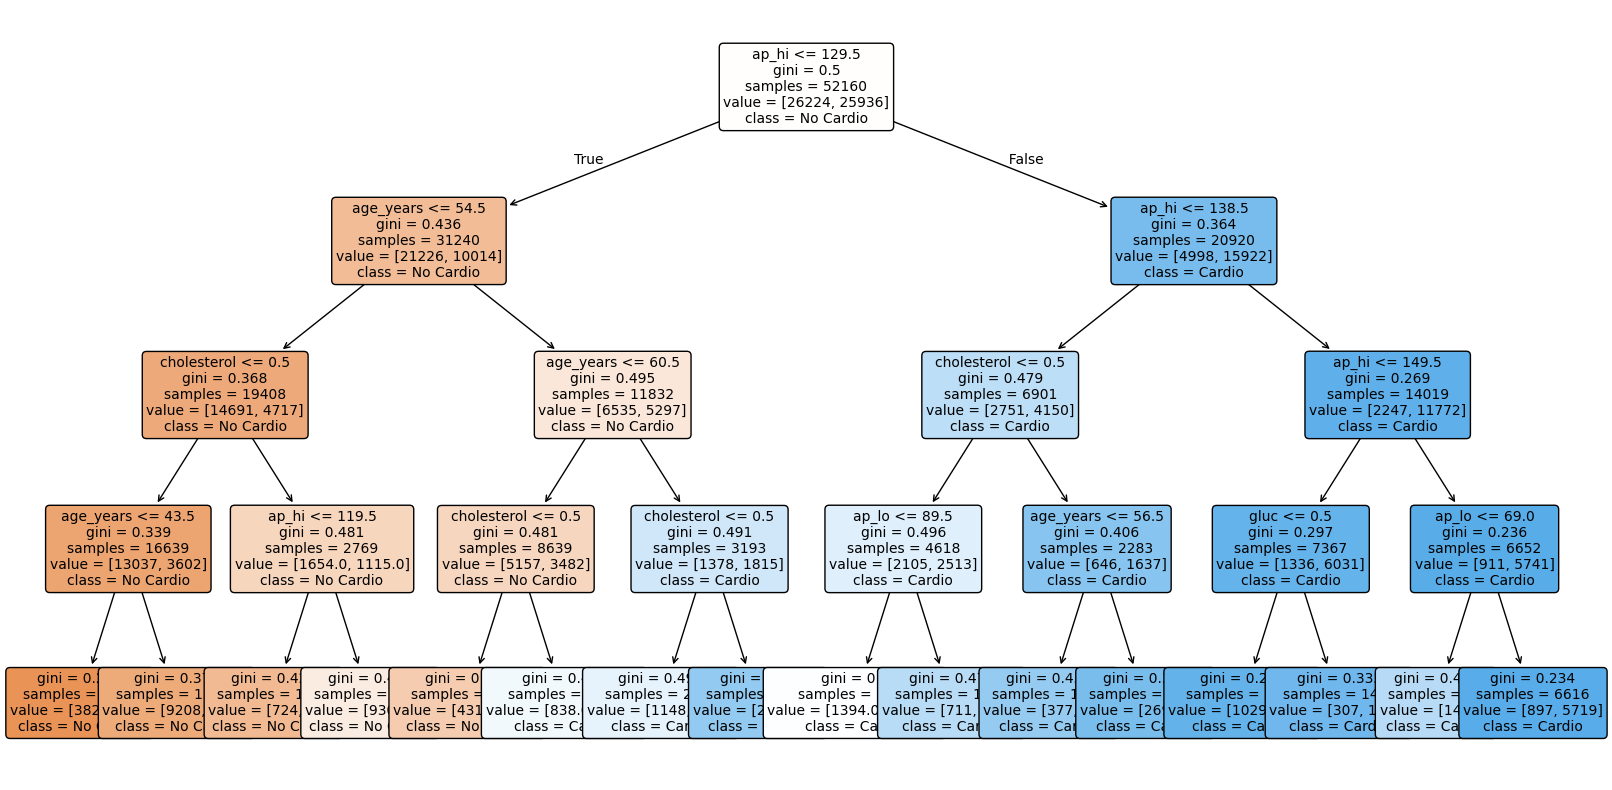

In [39]:
# Visualización del árbol
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=["No Cardio", "Cardio"], filled=True, fontsize=10, rounded=True)
plt.show()

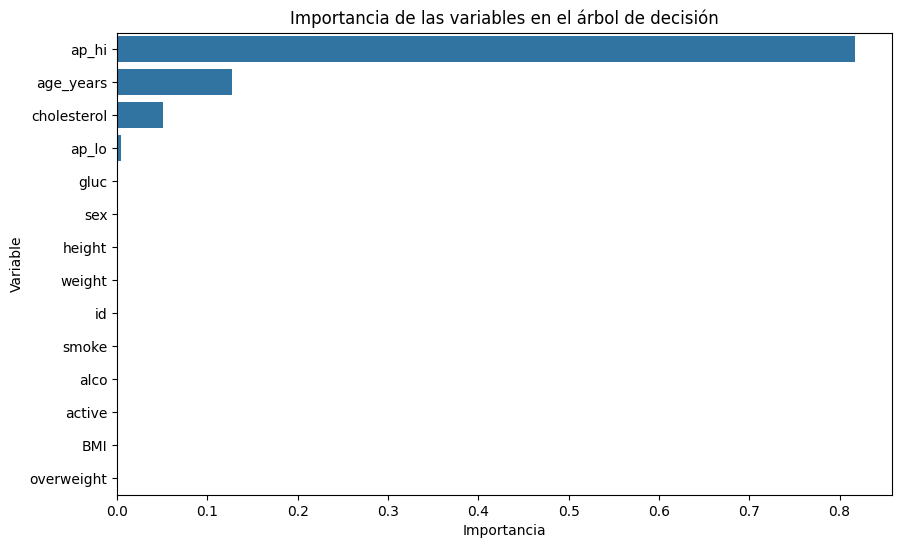

In [40]:
# Qué variables están influyendo más en la clasificación de riesgo cardiovascular
importances = tree.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=features.values, y=features.index)
plt.title("Importancia de las variables en el árbol de decisión")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()